##### Preprocessing: Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('myProjectDataset.csv')

# Replace a specific column (example: 'Height') with random values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))  # 181 because upper bound is exclusive

# Replace missing values or NaN in a salary column with a constant value '0'
df['Salary'] = df['Salary'].fillna(0)

# Replace missing values or NaN in a College column with a constant value 'Bosten University'
df['College'] = df['College'].fillna('Bosten University')

# Check the changes of Height, Salary and College
print(df[['Height']].head())
filtered_df = df[(df['Salary'] == 0) | (df['College'] == 'Bosten University')]
print(filtered_df)

   Height
0     155
1     157
2     163
3     167
4     167
                 Name            Team  Number Position  Age  Height  Weight  \
2        John Holland  Boston Celtics      30       SG   27     163     205   
4       Jonas Jerebko  Boston Celtics       8       PF   29     167     231   
5        Amir Johnson  Boston Celtics      90       PF   29     163     240   
15   Bojan Bogdanovic   Brooklyn Nets      44       SG   27     159     216   
20     Sergey Karasev   Brooklyn Nets      10       SG   22     169     208   
..                ...             ...     ...      ...  ...     ...     ...   
445        Dante Exum       Utah Jazz      11       PG   20     176     190   
447       Rudy Gobert       Utah Jazz      27        C   23     155     245   
450        Joe Ingles       Utah Jazz       2       SF   28     158     226   
454         Raul Neto       Utah Jazz      25       PG   24     174     179   
455      Tibor Pleiss       Utah Jazz      21        C   26     155    

##### 1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [28]:
# Group by Team and get the number of employees in each team
team_distribution = df['Team'].value_counts().reset_index()
team_distribution.columns = ['Team', 'EmployeeCount']

# Calculate percentage split based on total number of employees
total_employees = team_distribution['EmployeeCount'].sum()
team_distribution['Percentage'] = (team_distribution['EmployeeCount'] / total_employees * 100).round(2)

print(team_distribution)

                      Team  EmployeeCount  Percentage
0     New Orleans Pelicans             19        4.15
1        Memphis Grizzlies             18        3.93
2                Utah Jazz             16        3.49
3          New York Knicks             16        3.49
4          Milwaukee Bucks             16        3.49
5            Brooklyn Nets             15        3.28
6   Portland Trail Blazers             15        3.28
7    Oklahoma City Thunder             15        3.28
8           Denver Nuggets             15        3.28
9       Washington Wizards             15        3.28
10              Miami Heat             15        3.28
11       Charlotte Hornets             15        3.28
12           Atlanta Hawks             15        3.28
13       San Antonio Spurs             15        3.28
14         Houston Rockets             15        3.28
15          Boston Celtics             15        3.28
16          Indiana Pacers             15        3.28
17         Detroit Pistons  

#### Visualization

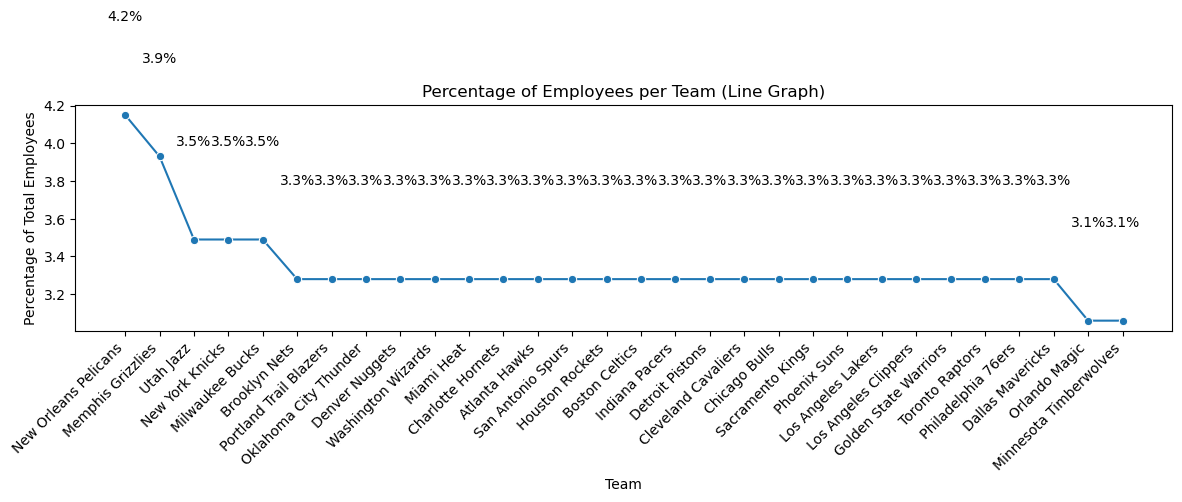

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=team_distribution, x='Team', y='Percentage', marker='o', sort=False)
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Employees per Team (Line Graph)')
plt.xlabel('Team')
plt.ylabel('Percentage of Total Employees')

# Add percentage labels on each point
for index, row in team_distribution.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", ha='center')

plt.tight_layout()
plt.show()


##### 2. Segregate employees based on their positions within the company.

In [48]:
# Group by Position and count the number of employees
print('----Group by Position and count the number of employees---------')
print('\n')
position_distribution = df['Position'].value_counts().reset_index()
position_distribution.columns = ['Position', 'Employees Count']
print(position_distribution)

# Group by Position
print('\n')
print('------------Group by each employee based on their position--------------')
print('\n')
positions = df['Position'].unique()
position_groups = {pos: df[df['Position'] == pos] for pos in positions}
print(position_groups)

----Group by Position and count the number of employees---------


  Position  Employees Count
0       SG              102
1       PF              100
2       PG               92
3       SF               85
4        C               79


------------Group by each employee based on their position--------------


{'PG':               Name                    Team  Number Position  Age  Height  \
0    Avery Bradley          Boston Celtics       0       PG   25     165   
8     Terry Rozier          Boston Celtics      12       PG   22     170   
9     Marcus Smart          Boston Celtics      36       PG   22     163   
11   Isaiah Thomas          Boston Celtics       4       PG   27     165   
19    Jarrett Jack           Brooklyn Nets       2       PG   32     166   
..             ...                     ...     ...      ...  ...     ...   
440  Brian Roberts  Portland Trail Blazers       2       PG   30     177   
443     Trey Burke               Utah Jazz       3       PG   23     168 

#### Visualization

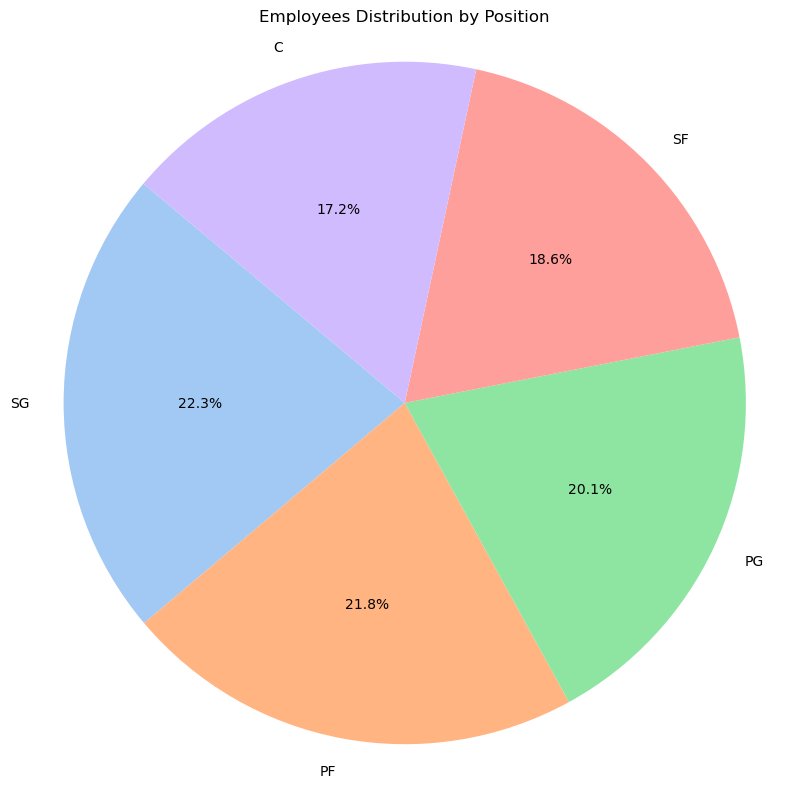

In [52]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    position_distribution['Employees Count'],
    labels=position_distribution['Position'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Employees Distribution by Position')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 3. Identify the predominant age group among employees

In [61]:
# Define age groups (20–25, 26–30, 31–35, 40+)
bins = [0, 25, 30, 35, 40, 100]
labels = ['<25', '25-30', '31-35', '36-40', '40+']

# Create a new column for age group
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count number of employees in each age group
age_group_counts = df['AgeGroup'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age Group', 'Employees Count']

# Identify the predominant age group
predominant_age_group = age_group_counts.loc[age_group_counts['Employees Count'].idxmax()]
print("Age Group Distribution:\n", age_group_counts)
print(f"\n Predominant Age Group: {predominant_age_group['Age Group']} "
      f"with {predominant_age_group['Employees Count']} employees")

Age Group Distribution:
   Age Group  Employees Count
0       <25              154
1     25-30              182
2     31-35               90
3     36-40               29
4       40+                3

 Predominant Age Group: 25-30 with 182 employees


#### Visualization

##### Here we can easily find the predominant age group by looking into the tallenst bar in the visualization

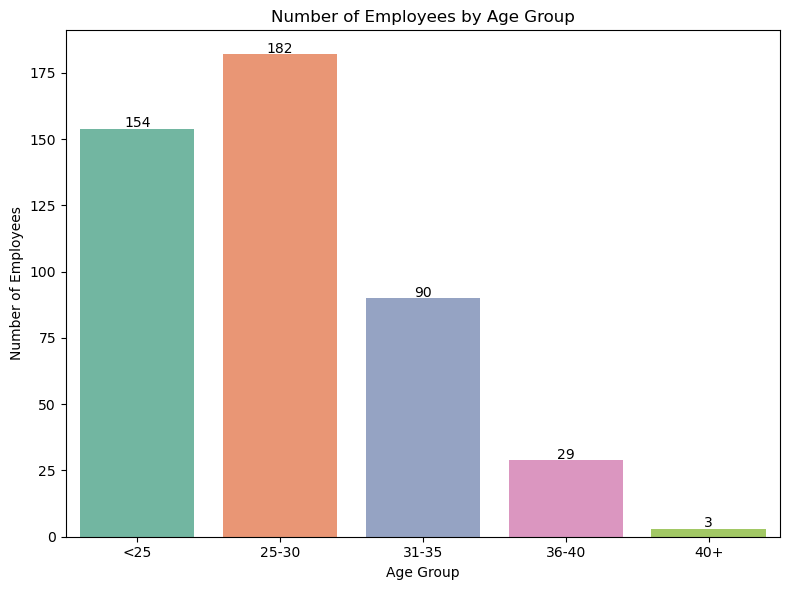

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=age_group_counts, x='Age Group', y='Employees Count', palette='Set2', hue='Age Group', dodge=False, legend=False)
plt.title('Number of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')

# Add labels on top of the bars
for index, row in age_group_counts.iterrows():
    barplot.text(index, row['Employees Count'] + 0.5, row['Employees Count'], ha='center')

plt.tight_layout()
plt.show()

##### 4. Discover which team and position have the highest salary expenditure.

In [84]:
# 1. Group by Team and sum salaries and sort the values by descending
team_salary = df.groupby('Team')['Salary'].sum().reset_index()
team_salary = team_salary.sort_values(by='Salary', ascending=False)

# 2. Group by Position and sum salaries and sort the values by descending
position_salary = df.groupby('Position')['Salary'].sum().reset_index()
position_salary = position_salary.sort_values(by='Salary', ascending=False)

# 3. Find top team
top_team = team_salary.iloc[0]

# 4. Find top position
top_position = position_salary.iloc[0]

# 5. Found the highest expenditure Team and Position individually
print("Salary Expenditure by Team:\n", team_salary)
print("\nSalary Expenditure by Position:\n", position_salary)
print(f"\nTeam with Highest Salary Expenditure: {top_team['Team']} (${top_team['Salary']:,.2f})")
print(f"\nPosition with Highest Salary Expenditure: {top_position['Position']} (${top_position['Salary']:,.2f})")

# 6. Group by Team and Position both, and sum the salaries
salary_by_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

# 7. Sort to find the highest combinations
salary_by_team_position_sorted = salary_by_team_position.sort_values(by='Salary', ascending=False)

# 8. Find top team and position
top_team_position = salary_by_team_position_sorted.iloc[0]

# 9. Found the highest expenditure team and position
print("\nSalary Expenditure by Team and Position:\n", salary_by_team_position_sorted)
print(f"\nHighest Salary Expenditure of Team and Position: {top_team_position['Team']} - {top_team_position['Position']} (${top_team_position['Salary']:,.2f})")

Salary Expenditure by Team:
                       Team       Salary
5      Cleveland Cavaliers  106988689.0
12    Los Angeles Clippers   94854640.0
20   Oklahoma City Thunder   93765298.0
9    Golden State Warriors   88868997.0
4            Chicago Bulls   86783378.0
26       San Antonio Spurs   84442733.0
18    New Orleans Pelicans   82750774.0
15              Miami Heat   82515673.0
3        Charlotte Hornets   78340920.0
14       Memphis Grizzlies   76550880.0
29      Washington Wizards   76328636.0
10         Houston Rockets   75283021.0
19         New York Knicks   73303898.0
0            Atlanta Hawks   72902950.0
13      Los Angeles Lakers   71770431.0
25        Sacramento Kings   71683666.0
6         Dallas Mavericks   71198732.0
27         Toronto Raptors   71117611.0
16         Milwaukee Bucks   69603517.0
8          Detroit Pistons   67168263.0
11          Indiana Pacers   66751826.0
28               Utah Jazz   64007367.0
23            Phoenix Suns   63445135.0
21         

#### Visualization

##### Top 20 Highest Salary Expenditures by Team and Position

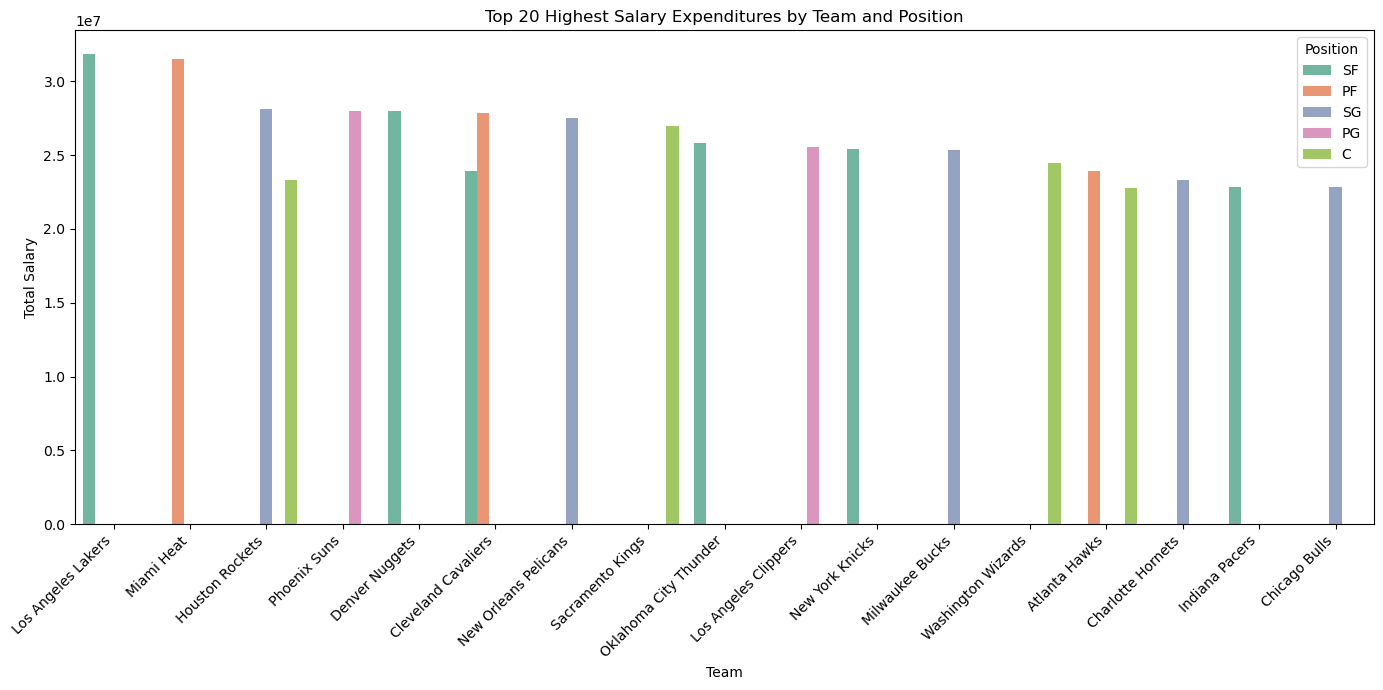

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Team and Position, and sum the salaries
salary_by_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

# Sort to find the highest combinations
salary_by_team_position_sorted = salary_by_team_position.sort_values(by='Salary', ascending=False)

# Select the top 20
top20_salary_by_team_position = salary_by_team_position_sorted.head(20)

# Plotting the top 20 as a barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=top20_salary_by_team_position, x='Team', y='Salary', hue='Position', palette='Set2')
plt.title('Top 20 Highest Salary Expenditures by Team and Position')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position')
plt.tight_layout()
plt.show()


##### Highest Salary Expenditures by Team

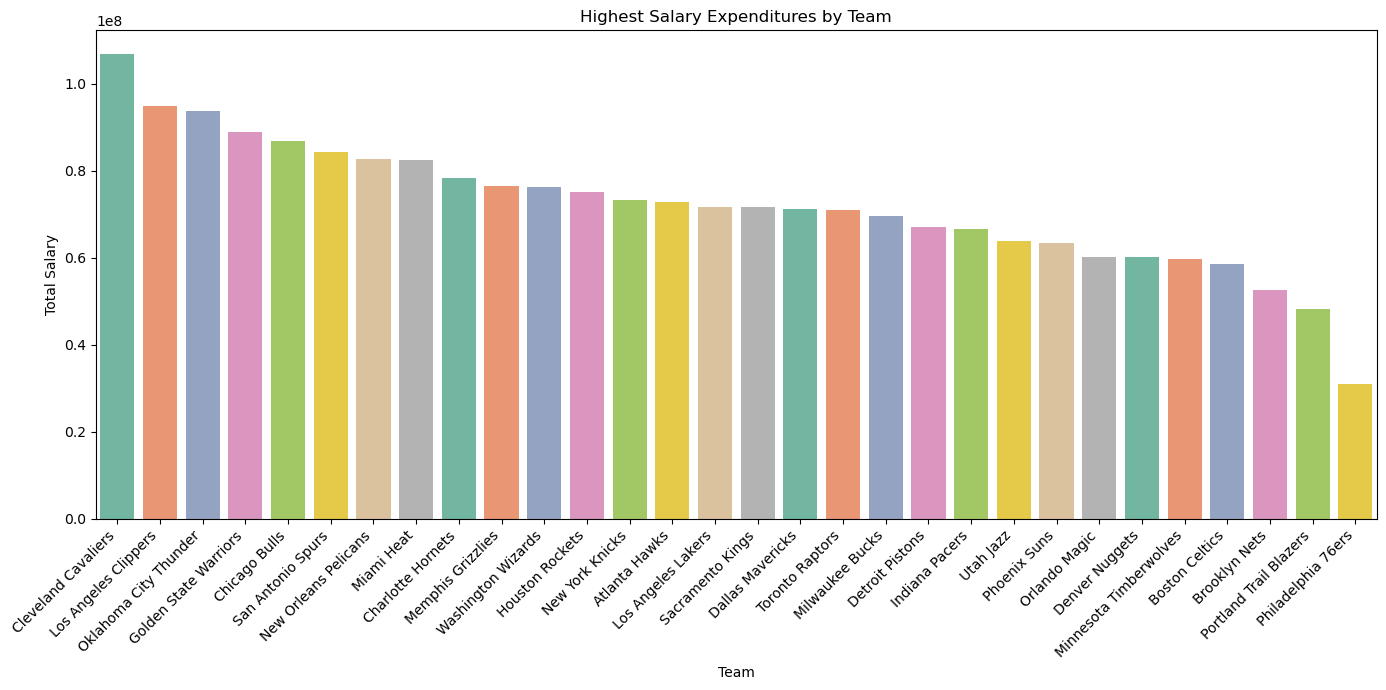

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Team and sum salaries
team_salary = df.groupby('Team')['Salary'].sum().reset_index()

# Sort to find the highest combinations
team_salary = team_salary.sort_values(by='Salary', ascending=False)

# Plotting the top 20 as a barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=team_salary, x='Team', y='Salary', hue='Team', palette='Set2')
plt.title('Highest Salary Expenditures by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Highest Salary Expenditures by Position

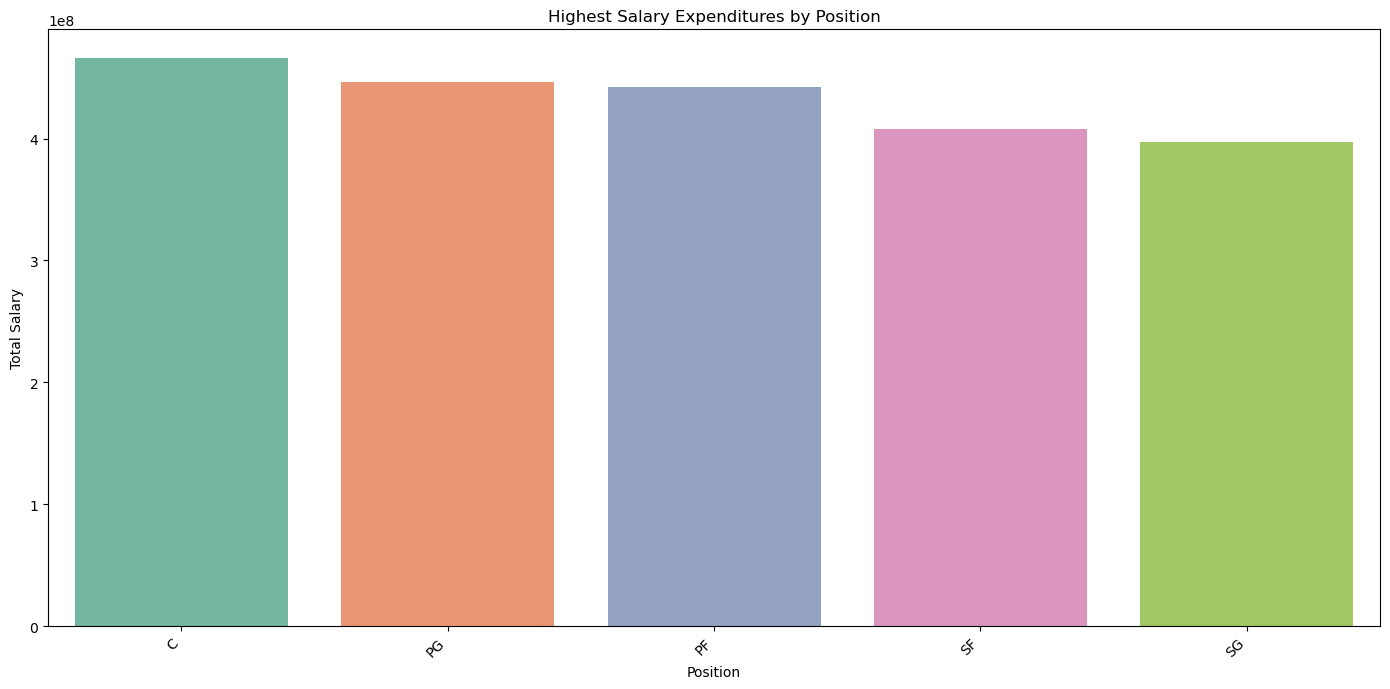

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Position and sum salaries
position_salary = df.groupby('Position')['Salary'].sum().reset_index()

# Sort to find the highest combinations
position_salary = position_salary.sort_values(by='Salary', ascending=False)

# Plotting the top 20 as a barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=position_salary, x='Position', y='Salary', hue='Position', palette='Set2')
plt.title('Highest Salary Expenditures by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 5. Investigate if there's any correlation between age and salary, and represent it visually.

In [107]:
# Group by Age Group and sum salaries and sort the values by descending
agegroup_salary = df.groupby('AgeGroup')['Salary'].sum().reset_index()
agegroup_salary = agegroup_salary.sort_values(by='Salary', ascending=False)

print("Salary Expenditure by Age Group:\n", agegroup_salary)

Salary Expenditure by Age Group:
   AgeGroup        Salary
1    25-30  1.009530e+09
2    31-35  6.305176e+08
0      <25  4.059318e+08
3    36-40  1.008044e+08
4      40+  1.400075e+07


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12340\2228674980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_salary = df.groupby('AgeGroup')['Salary'].sum().reset_index()


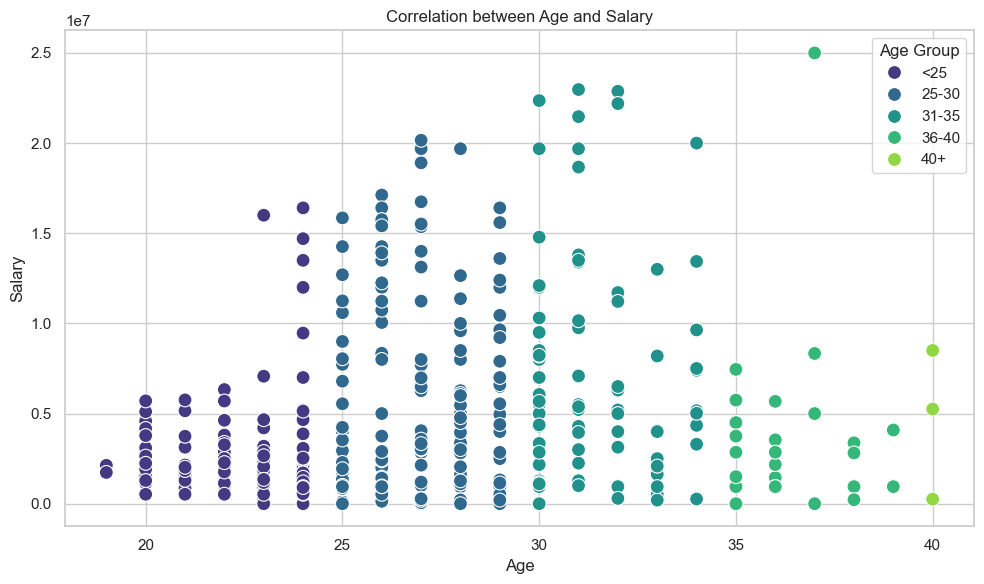

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='AgeGroup', palette='viridis', s=100)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()